In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns

C:\Users\simon\miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\simon\miniconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\simon\miniconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# https://covid19.who.int/data
# https://health.google.com/covid-19/open-data/raw-data
# 3 methods: k-means, regression, HMMS (used to be naive bayes)

In [100]:
# reading in COVID-19 datasets
dem_df = pd.read_csv('../data/demographics.csv')
eco_df = pd.read_csv('../data/economy.csv')
epi_df = pd.read_csv('../data/epidemiology.csv')
vac_df = pd.read_csv('../data/vaccinations.csv')
hos_df = pd.read_csv('../data/hospitalizations.csv')
gov_df = pd.read_csv('../data/oxford-government-response.csv')
idx_df = pd.read_csv('../data/index.csv')

In [4]:
# viewing datasets
dem_df.head(3)

,location_key,population,population_male,population_female,population_rural,population_urban,population_largest_city,population_clustered,population_density,human_development_index,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_and_older
0,AD,77265.0,58625.0,55581.0,9269.0,67873.0,NaN,NaN,164.394,0.858,9370.0,12022.0,10727.0,12394.0,21001.0,20720.0,14433.0,8657.0,4881.0
1,AE,9890400.0,6836349.0,3054051.0,1290785.0,8479744.0,2833079.0,5914068.0,118.306,0.863,1011713.0,842991.0,2149343.0,3169314.0,1608109.0,797913.0,242707.0,55884.0,12426.0
2,AF,38928341.0,19976265.0,18952076.0,28244481.0,9797273.0,4114030.0,4114030.0,59.627,0.498,11088732.0,9821559.0,7035871.0,4534646.0,2963459.0,1840198.0,1057496.0,480455.0,105925.0


In [5]:
eco_df.head(3)

,location_key,gdp_usd,gdp_per_capita_usd,human_capital_index
0,AD,3.154058e+09,40886.0,NaN
1,AE,4.211423e+11,43103.0,0.659
2,AF,1.910135e+10,502.0,0.389


In [6]:
epi_df.head(3)

,date,location_key,new_confirmed,new_deceased,new_recovered,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested
0,2020-01-01,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
1,2020-01-02,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
2,2020-01-03,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN


In [7]:
vac_df.head(3)

,date,location_key,new_persons_vaccinated,cumulative_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,new_vaccine_doses_administered,cumulative_vaccine_doses_administered,new_persons_vaccinated_pfizer,cumulative_persons_vaccinated_pfizer,...,new_persons_fully_vaccinated_janssen,cumulative_persons_fully_vaccinated_janssen,new_vaccine_doses_administered_janssen,cumulative_vaccine_doses_administered_janssen,new_persons_vaccinated_sinovac,total_persons_vaccinated_sinovac,new_persons_fully_vaccinated_sinovac,total_persons_fully_vaccinated_sinovac,new_vaccine_doses_administered_sinovac,total_vaccine_doses_administered_sinovac
0,2021-01-25,AD,NaN,576.0,NaN,NaN,NaN,576.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02-01,AD,460.0,1036.0,NaN,NaN,460.0,1036.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-02-10,AD,255.0,1291.0,NaN,NaN,255.0,1291.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
idx_df.head(3)

,location_key,place_id,wikidata_id,datacommons_id,country_code,country_name,subregion1_code,subregion1_name,subregion2_code,subregion2_name,locality_code,locality_name,iso_3166_1_alpha_2,iso_3166_1_alpha_3,aggregation_level
0,AD,ChIJlfCemC71pRIRkn_qeNc-yQc,Q228,country/AND,AD,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,AD,AND,0
1,AE,ChIJvRKrsd9IXj4RpwoIwFYv0zM,Q878,country/ARE,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,AE,ARE,0
2,AF,ChIJbQL_-LZu0TgReNqWvg1GtfM,Q889,country/AFG,AF,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,AF,AFG,0


In [9]:
idx_df[['country_name']]

,country_name
0,Andorra
1,United Arab Emirates
2,Afghanistan
3,Afghanistan
4,Afghanistan
...,...
22958,South Africa
22959,South Africa
22960,South Africa
22961,Zambia


In [10]:
idx_df.loc[idx_df['country_name'] == 'United States of America']

,location_key,place_id,wikidata_id,datacommons_id,country_code,country_name,subregion1_code,subregion1_name,subregion2_code,subregion2_name,locality_code,locality_name,iso_3166_1_alpha_2,iso_3166_1_alpha_3,aggregation_level
19557,US,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,Q30,country/USA,US,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,US,USA,0
19558,US_AK,ChIJG8CuwJzfAFQRNduKqSde27w,Q797,geoId/02,US,United States of America,AK,Alaska,NaN,NaN,NaN,NaN,US,USA,1
19559,US_AK_02013,ChIJ7a-UgVuW_lYRjTetzbIWL48,Q504371,geoId/02013,US,United States of America,AK,Alaska,02013,Aleutians East,NaN,NaN,US,USA,2
19560,US_AK_02016,ChIJI9ivbI1Pg1cRg8d4nlGjGVU,Q185533,geoId/02016,US,United States of America,AK,Alaska,02016,Aleutians West,NaN,NaN,US,USA,2
19561,US_AK_02020,ChIJQT-zBHaRyFYR42iEp1q6fSU,Q39450,geoId/02020,US,United States of America,AK,Alaska,02020,Anchorage Municipality,NaN,NaN,US,USA,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22837,US_WY_56037,ChIJEVZf4rRTWocRoqATF0f_rnA,Q484194,geoId/56037,US,United States of America,WY,Wyoming,56037,Sweetwater County,NaN,NaN,US,USA,2
22838,US_WY_56039,ChIJV3wGpVVrUlMR3m18oGf5rvk,Q488912,geoId/56039,US,United States of America,WY,Wyoming,56039,Teton County,NaN,NaN,US,USA,2
22839,US_WY_56041,ChIJR4w4T5CnUYcRvTPRgMmXumM,Q483973,geoId/56041,US,United States of America,WY,Wyoming,56041,Uinta County,NaN,NaN,US,USA,2
22840,US_WY_56043,ChIJIXR5_L9BS1MRLvs8KUxeZC8,Q112846,geoId/56043,US,United States of America,WY,Wyoming,56043,Washakie County,NaN,NaN,US,USA,2


In [11]:
# get the US data
us_epi_df = epi_df.loc[epi_df['location_key'] == 'US']
us_vac_df = vac_df.loc[vac_df['location_key'] == 'US']

In [12]:
us_ev_df = us_epi_df.merge(us_vac_df, on='date', how='inner')

In [13]:
us_ev_df

,date,location_key_x,new_confirmed,new_deceased,new_recovered,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested,...,new_persons_fully_vaccinated_janssen,cumulative_persons_fully_vaccinated_janssen,new_vaccine_doses_administered_janssen,cumulative_vaccine_doses_administered_janssen,new_persons_vaccinated_sinovac,total_persons_vaccinated_sinovac,new_persons_fully_vaccinated_sinovac,total_persons_fully_vaccinated_sinovac,new_vaccine_doses_administered_sinovac,total_vaccine_doses_administered_sinovac
0,2020-12-13,US,177830.0,2021.0,NaN,1495092.0,16119805.0,287276.0,NaN,228772064.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-12-14,US,195630.0,1996.0,NaN,1946701.0,16315435.0,289272.0,NaN,230718765.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-12-15,US,197440.0,2724.0,NaN,2078178.0,16512875.0,291996.0,NaN,232796943.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-12-16,US,237037.0,3374.0,NaN,2053475.0,16749912.0,295370.0,NaN,234850418.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-12-17,US,242528.0,3316.0,NaN,2022937.0,16992440.0,298686.0,NaN,236873355.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,2022-09-10,US,19715.0,51.0,NaN,NaN,92225201.0,1003766.0,NaN,NaN,...,0.0,17094523.0,0.0,18881650.0,NaN,NaN,NaN,NaN,NaN,NaN
637,2022-09-11,US,16742.0,10.0,NaN,NaN,92241943.0,1003776.0,NaN,NaN,...,0.0,17094523.0,0.0,18881650.0,NaN,NaN,NaN,NaN,NaN,NaN
638,2022-09-12,US,60728.0,213.0,NaN,NaN,92302671.0,1003989.0,NaN,NaN,...,0.0,17094523.0,0.0,18881650.0,NaN,NaN,NaN,NaN,NaN,NaN
639,2022-09-13,US,54413.0,460.0,NaN,NaN,92357092.0,1004449.0,NaN,NaN,...,0.0,17094523.0,0.0,18881650.0,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: xlabel='date', ylabel='cumulative_confirmed'>

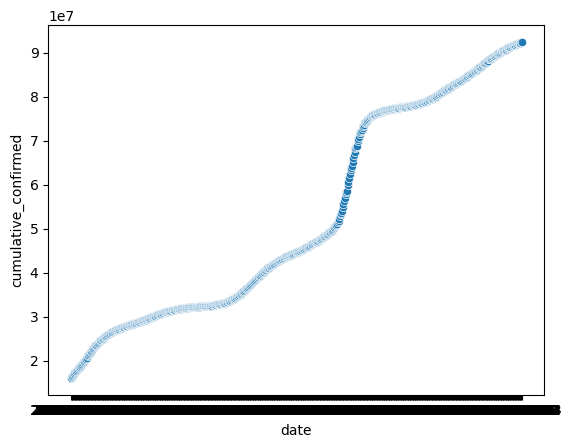

In [14]:
sns.scatterplot(data=us_ev_df, x="date", y="cumulative_confirmed")
#ax.xaxis.set_major_formatter(dates.DateFormatter("%d"))

### Linear regression

In [15]:
# use index as x, proxy for date, try to estimate y which is cumulative confirmed

In [16]:
indices = us_ev_df.index.values
covid_cases = us_ev_df['cumulative_confirmed'].values

In [17]:
def estimate_coefficients(x, y):
    num_dates = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
  
    cross_dev = np.sum(y*x) - (num_dates * y_mean * x_mean)
    sum_sq_x = np.sum(x*x) - (num_dates * x_mean * x_mean)
  
    b1 = cross_dev / sum_sq_x
    b0 = y_mean - b1*x_mean
  
    return (b0, b1)

In [20]:
us_ev_df

,date,location_key_x,new_confirmed,new_deceased,new_recovered,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested,...,new_persons_fully_vaccinated_janssen,cumulative_persons_fully_vaccinated_janssen,new_vaccine_doses_administered_janssen,cumulative_vaccine_doses_administered_janssen,new_persons_vaccinated_sinovac,total_persons_vaccinated_sinovac,new_persons_fully_vaccinated_sinovac,total_persons_fully_vaccinated_sinovac,new_vaccine_doses_administered_sinovac,total_vaccine_doses_administered_sinovac
0,2020-12-13,US,177830.0,2021.0,NaN,1495092.0,16119805.0,287276.0,NaN,228772064.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-12-14,US,195630.0,1996.0,NaN,1946701.0,16315435.0,289272.0,NaN,230718765.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-12-15,US,197440.0,2724.0,NaN,2078178.0,16512875.0,291996.0,NaN,232796943.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-12-16,US,237037.0,3374.0,NaN,2053475.0,16749912.0,295370.0,NaN,234850418.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-12-17,US,242528.0,3316.0,NaN,2022937.0,16992440.0,298686.0,NaN,236873355.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,2022-09-10,US,19715.0,51.0,NaN,NaN,92225201.0,1003766.0,NaN,NaN,...,0.0,17094523.0,0.0,18881650.0,NaN,NaN,NaN,NaN,NaN,NaN
637,2022-09-11,US,16742.0,10.0,NaN,NaN,92241943.0,1003776.0,NaN,NaN,...,0.0,17094523.0,0.0,18881650.0,NaN,NaN,NaN,NaN,NaN,NaN
638,2022-09-12,US,60728.0,213.0,NaN,NaN,92302671.0,1003989.0,NaN,NaN,...,0.0,17094523.0,0.0,18881650.0,NaN,NaN,NaN,NaN,NaN,NaN
639,2022-09-13,US,54413.0,460.0,NaN,NaN,92357092.0,1004449.0,NaN,NaN,...,0.0,17094523.0,0.0,18881650.0,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
us_ev_df['cumulative_persons_fully_vaccinated_janssen'].max()

17094523.0

In [37]:
vaccs[~np.isnan(vaccs)]
covid_cases[~np.isnan(vaccs)]

array([28249548., 28300693., 28358258., 28414108., 28474030., 28522220.,
       28565536., 28606286., 28655482., 28711717., 28770413., 28828416.,
       28882863., 28924180., 28969709., 29024807., 29088086., 29149753.,
       29220342., 29278638., 29327640., 29383076., 29442366., 29508492.,
       29578545., 29645468., 29705599., 29747862., 29802256., 29864419.,
       29936245., 30008793., 30082752., 30148178., 30199367., 30259217.,
       30329197., 30397734., 30467954., 30537258., 30612860., 30660484.,
       30694839., 30751182., 30813043., 30873479., 30934613., 30985135.,
       31024947., 31054699., 31104279., 31157818., 31212578., 31266636.,
       31313900., 31349525., 31382076., 31424094., 31468000., 31510232.,
       31554141., 31590218., 31616838., 31641025., 31673722., 31709003.,
       31748807., 31783613., 31812732., 31833597., 31852809., 31880272.,
       31907505., 31934977., 31962585., 31984342., 31999877., 32014950.,
       32039094., 32062344., 32084129., 32108627., 

In [51]:
vaccs_raw = us_ev_df['cumulative_persons_fully_vaccinated_janssen'].values
covid_cases_raw = us_ev_df['cumulative_confirmed'].values

len(~np.isnan(vaccs_raw))
# vaccs = vaccs_raw[~np.isnan(vaccs_raw)]
covid_cases = covid_cases_raw[~np.isnan(vaccs_raw)]

In [54]:
us_ev_df['log_vacc'] = np.log(us_ev_df['cumulative_persons_fully_vaccinated_janssen'])
us_ev_df['log_cases'] = np.log(us_ev_df['cumulative_confirmed'])

<AxesSubplot: xlabel='cumulative_persons_fully_vaccinated_janssen', ylabel='log_cases'>

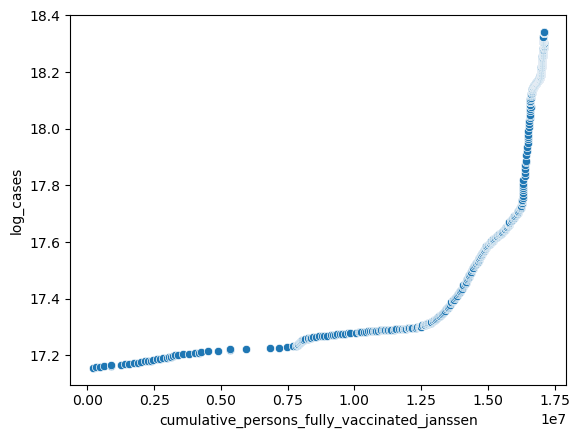

In [61]:
sns.scatterplot(data=us_ev_df, x="cumulative_persons_fully_vaccinated_janssen", y="log_cases")

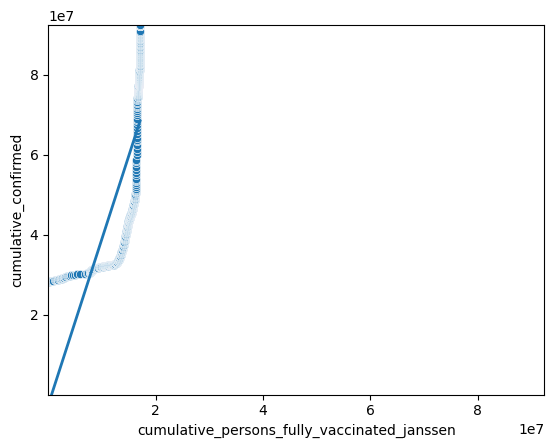

In [55]:
fig, ax = plt.subplots()
sns.scatterplot(data=us_ev_df, ax=ax, x="cumulative_persons_fully_vaccinated_janssen", y="cumulative_confirmed")
ax.set_xlim(1,us_ev_df['cumulative_confirmed'].max())
ax.set_ylim(1,us_ev_df['cumulative_confirmed'].max())

vaccs_raw = us_ev_df['cumulative_persons_fully_vaccinated_janssen'].values
covid_cases_raw = us_ev_df['cumulative_confirmed'].values

vaccs = vaccs_raw[~np.isnan(vaccs_raw)]
covid_cases = covid_cases_raw[~np.isnan(vaccs_raw)]

#print(vaccs)

b0, b1 = estimate_coefficients(vaccs, covid_cases)
y_vals = vaccs * b1 + b0
plt.plot(vaccs, y_vals, linewidth=2)

plt.show()

In [18]:
b0, b1 = estimate_coefficients(indices, covid_cases)
print(b0)
print(b1)

12503200.404420659
125748.74301270649


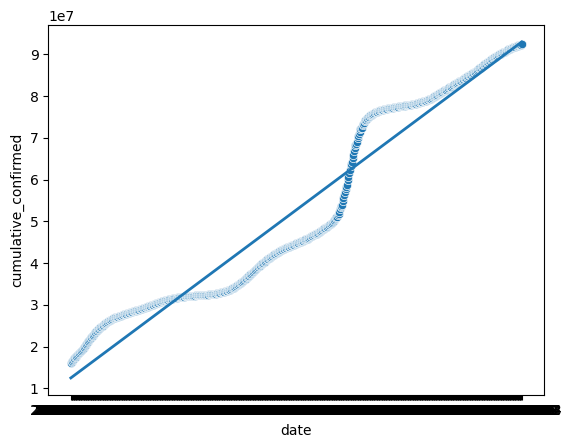

In [19]:
y_vals = indices * b1 + b0
# print(y)
sns.scatterplot(data=us_ev_df, x="date", y="cumulative_confirmed")
plt.plot(us_ev_df['date'], y_vals, linewidth=2)

### Clustering

In [70]:
round(42.5, -1)

40.0

In [80]:
46.5 // 10

4.0

In [90]:
gov_df['rounded_stringency_index'] = gov_df['stringency_index'].round(-1).astype(str)
gov_df.tail(20)

,date,location_key,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,...,international_support,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,facial_coverings,vaccination_policy,stringency_index,rounded_stringency_index
303949,2022-06-19,ZW,0.0,1.0,1.0,3.0,0.0,2.0,0.0,1.0,...,NaN,2.0,3.0,1.0,NaN,0.0,3.0,5.0,38.89,40.0
303950,2022-06-20,ZW,0.0,1.0,1.0,3.0,0.0,2.0,0.0,1.0,...,NaN,2.0,3.0,1.0,NaN,0.0,3.0,5.0,38.89,40.0
303951,2022-06-21,ZW,0.0,1.0,1.0,3.0,0.0,2.0,0.0,1.0,...,NaN,2.0,3.0,1.0,NaN,0.0,3.0,5.0,38.89,40.0
303952,2022-06-22,ZW,0.0,1.0,1.0,3.0,0.0,2.0,0.0,1.0,...,NaN,2.0,3.0,1.0,NaN,0.0,3.0,5.0,38.89,40.0
303953,2022-06-23,ZW,0.0,1.0,1.0,3.0,0.0,2.0,0.0,1.0,...,NaN,2.0,3.0,1.0,NaN,0.0,3.0,5.0,38.89,40.0
303954,2022-06-24,ZW,0.0,1.0,1.0,3.0,0.0,2.0,0.0,1.0,...,NaN,2.0,3.0,1.0,NaN,0.0,3.0,5.0,38.89,40.0
303955,2022-06-25,ZW,0.0,1.0,1.0,3.0,0.0,2.0,0.0,1.0,...,NaN,2.0,3.0,1.0,NaN,0.0,3.0,5.0,38.89,40.0
303956,2022-06-26,ZW,0.0,1.0,1.0,3.0,0.0,2.0,0.0,1.0,...,NaN,2.0,3.0,1.0,NaN,0.0,3.0,5.0,38.89,40.0
303957,2022-06-27,ZW,0.0,1.0,1.0,3.0,0.0,2.0,0.0,1.0,...,NaN,2.0,3.0,1.0,NaN,0.0,3.0,5.0,38.89,40.0
303958,2022-06-28,ZW,0.0,1.0,1.0,3.0,0.0,2.0,0.0,1.0,...,NaN,2.0,3.0,1.0,NaN,0.0,3.0,5.0,38.89,40.0


In [358]:
date = '2021-12-31'

In [359]:
gov_day = (gov_df.loc[gov_df['date'] == date]).drop('date', axis=1)
epi_day = (epi_df.loc[epi_df['date'] == date]).drop('date', axis=1)
vac_day = (vac_df.loc[vac_df['date'] == date]).drop('date', axis=1)
hos_day = (hos_df.loc[hos_df['date'] == date]).drop('date', axis=1)

In [360]:
gov_day['location_key'] = gov_day['location_key'].str.slice(0,2)
gov_day_agg = gov_day.groupby(['location_key']).mean()
#gov_day_agg

In [361]:
epi_day['location_key'] = epi_day['location_key'].str.slice(0,2)
epi_day_agg = epi_day.groupby(['location_key']).sum()
#epi_day_agg

In [362]:
vac_day['location_key'] = vac_day['location_key'].str.slice(0,2)
vac_day_agg = vac_day.groupby(['location_key']).sum()
#vac_day_agg

In [363]:
hos_day['location_key'] = hos_day['location_key'].str.slice(0,2)
hos_day_agg = hos_day.groupby(['location_key']).sum()
#hos_day_agg

In [364]:
dem_df['location_key'] = dem_df['location_key'].str.slice(0,2)
dem_df_agg = dem_df.groupby(['location_key']).sum()
dem_df_agg

,population,population_male,population_female,population_rural,population_urban,population_largest_city,population_clustered,population_density,human_development_index,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_and_older
location_key,,,,,,,,,,,,,,,,,,
AD,77265.0,58625.0,55581.0,9269.0,67873.0,0.0,0.0,164.394,0.858,9370.0,12022.0,10727.0,12394.0,21001.0,20720.0,14433.0,8657.0,4881.0
AE,9890400.0,6836349.0,3054051.0,1290785.0,8479744.0,2833079.0,5914068.0,118.306,0.863,1011713.0,842991.0,2149343.0,3169314.0,1608109.0,797913.0,242707.0,55884.0,12426.0
AF,75890710.0,19976265.0,18952076.0,28244481.0,9797273.0,4114030.0,4114030.0,59.627,0.498,11088732.0,9821559.0,7035871.0,4534646.0,2963459.0,1840198.0,1057496.0,480455.0,105925.0
AG,97928.0,47269.0,50659.0,73318.0,23800.0,0.0,0.0,222.564,0.780,14583.0,13867.0,14894.0,14094.0,13860.0,12832.0,8043.0,4101.0,1654.0
AI,15002.0,7151.0,7971.0,0.0,0.0,0.0,0.0,166.689,0.000,2196.0,2146.0,2005.0,2081.0,2187.0,2214.0,1351.0,641.0,301.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YE,29825968.0,15024985.0,14800983.0,18292399.0,10869523.0,2874373.0,2874373.0,56.492,0.452,8033408.0,6750274.0,5732746.0,4140438.0,2362804.0,1422835.0,879450.0,403471.0,100542.0
YT,272813.0,134159.0,138654.0,0.0,0.0,0.0,0.0,727.501,0.000,71474.0,64566.0,43627.0,32986.0,27349.0,16164.0,9372.0,4998.0,2277.0
ZA,173742611.0,60035344.0,61450123.0,19408553.0,39149717.0,5635127.0,20836302.0,48.891,0.699,23453780.0,21441382.0,21070304.0,20450065.0,14431633.0,10098574.0,6581466.0,3020761.0,937499.0


In [365]:
# checkpoint dataset
covid_agg_unnorm_df = epi_day_agg.merge(vac_day_agg.merge(hos_day_agg, on='location_key', how='inner'), on='location_key', how='inner')
covid_agg_unnorm_df = covid_agg_unnorm_df.merge(dem_df_agg, on='location_key', how='inner')
covid_agg_unnorm_df

,new_confirmed,new_deceased,new_recovered,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested,new_persons_vaccinated,cumulative_persons_vaccinated,...,human_development_index,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_and_older
location_key,,,,,,,,,,,,,,,,,,,,,
AR,135582.0,78.0,0.0,311230.0,16969535.0,345544.0,0.0,61848928.0,5242.0,48611059.0,...,0.825,20152826.0,21132404.0,19289237.0,17328771.0,13519219.0,11733925.0,8741268.0,5451824.0,2980846.0
AU,65773.0,26.0,9188.0,510882.0,791008.0,4478.0,504792.0,109917928.0,274615.0,45873981.0,...,0.939,6130116.0,5815175.0,6277713.0,6886363.0,6132141.0,5773318.0,4927952.0,3423267.0,1949520.0
BE,24373.0,22.0,0.0,39324.0,4216598.0,28422.0,0.0,27400673.0,479.0,9206116.0,...,1.851,2565522.0,2576614.0,2833734.0,2977128.0,3017804.0,3188512.0,2652070.0,1805716.0,1293938.0
BR,32369.0,230.0,1702.0,0.0,70639757.0,2006477.0,21584402.0,0.0,18088.0,323635730.0,...,3774.483,92227681.0,106194160.0,110675661.0,100770989.0,84911269.0,65631301.0,42182676.0,22549361.0,11031997.0
CH,32266.0,48.0,1222.0,145982.0,2701944.0,23890.0,136262.0,28757704.0,1242.0,11933194.0,...,0.930,1736368.0,1682548.0,2105466.0,2430392.0,2408864.0,2563756.0,1863050.0,1411306.0,887304.0
CL,8802.0,244.0,0.0,116957.0,5725361.0,128561.0,0.0,25786263.0,3373.0,17307870.0,...,0.832,5218950.0,5230714.0,6083260.0,6181276.0,5361430.0,4987286.0,3670389.0,2018287.0,1010544.0
CZ,14934.0,165.0,25924.0,35510.0,7413380.0,109053.0,7086406.0,15774300.0,1022.0,13662050.0,...,0.888,3321848.0,3016806.0,3363421.0,4397916.0,5068876.0,3875075.0,3949080.0,2888512.0,1276791.0
ES,243439.0,195.0,2028.0,0.0,15532718.0,184160.0,335742.0,0.0,24929.0,4382638.0,...,3.622,9266379.0,10172984.0,10134119.0,13104044.0,16405675.0,14548713.0,10946481.0,8006494.0,5992087.0
FR,616400.0,561.0,1352499.0,4596004.0,23078503.0,312779.0,461552199.0,572601383.0,33143.0,154931665.0,...,1.845,23248820.0,24604754.0,22343996.0,24642774.0,25714202.0,26073861.0,23782899.0,16218619.0,12245178.0


In [366]:
covid_agg_unnorm_df.columns

Index(['new_confirmed', 'new_deceased', 'new_recovered', 'new_tested',
       'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered',
       'cumulative_tested', 'new_persons_vaccinated',
       'cumulative_persons_vaccinated', 'new_persons_fully_vaccinated',
       'cumulative_persons_fully_vaccinated', 'new_vaccine_doses_administered',
       'cumulative_vaccine_doses_administered',
       'new_persons_vaccinated_pfizer', 'cumulative_persons_vaccinated_pfizer',
       'new_persons_fully_vaccinated_pfizer',
       'cumulative_persons_fully_vaccinated_pfizer',
       'new_vaccine_doses_administered_pfizer',
       'cumulative_vaccine_doses_administered_pfizer',
       'new_persons_vaccinated_moderna',
       'cumulative_persons_vaccinated_moderna',
       'new_persons_fully_vaccinated_moderna',
       'cumulative_persons_fully_vaccinated_moderna',
       'new_vaccine_doses_administered_moderna',
       'cumulative_vaccine_doses_administered_moderna',
       'new_persons_

In [367]:
covid_selected_df = covid_agg_unnorm_df[['cumulative_confirmed', 'cumulative_deceased', 'cumulative_hospitalized_patients', 'cumulative_persons_vaccinated', 'population']]

In [368]:
covid_selected_df

,cumulative_confirmed,cumulative_deceased,cumulative_hospitalized_patients,cumulative_persons_vaccinated,population
location_key,,,,,
AR,16969535.0,345544.0,1265268.0,48611059.0,1.299764e+08
AU,791008.0,4478.0,0.0,45873981.0,5.038244e+07
BE,4216598.0,28422.0,193540.0,9206116.0,2.291104e+07
BR,70639757.0,2006477.0,3183024.0,323635730.0,6.362271e+08
CH,2701944.0,23890.0,80652.0,11933194.0,1.708905e+07
CL,5725361.0,128561.0,0.0,17307870.0,5.272201e+07
CZ,7413380.0,109053.0,0.0,13662050.0,3.054090e+07
ES,15532718.0,184160.0,890525.0,4382638.0,1.149764e+08
FR,23078503.0,312779.0,602814.0,154931665.0,1.989015e+08


In [369]:
covid_selected_df['cumulative_confirmed'] /= covid_selected_df['population']
covid_selected_df['cumulative_deceased'] /= covid_selected_df['population']
covid_selected_df['cumulative_hospitalized_patients'] /= covid_selected_df['population']
covid_selected_df['cumulative_persons_vaccinated'] /= covid_selected_df['population']

C:\Users\simon\AppData\Local\Temp\ipykernel_48468\2475988544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_selected_df['cumulative_confirmed'] /= covid_selected_df['population']
C:\Users\simon\AppData\Local\Temp\ipykernel_48468\2475988544.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_selected_df['cumulative_deceased'] /= covid_selected_df['population']
C:\Users\simon\AppData\Local\Temp\ipykernel_48468\2475988544.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [370]:
covid_selected_df = covid_selected_df.drop('population', axis=1)
covid_selected_df

,cumulative_confirmed,cumulative_deceased,cumulative_hospitalized_patients,cumulative_persons_vaccinated
location_key,,,,
AR,0.130559,0.002659,0.009735,0.373999
AU,0.015700,0.000089,0.000000,0.910515
BE,0.184042,0.001241,0.008447,0.401820
BR,0.111029,0.003154,0.005003,0.508680
CH,0.158110,0.001398,0.004720,0.698295
CL,0.108595,0.002438,0.000000,0.328285
CZ,0.242736,0.003571,0.000000,0.447336
ES,0.135095,0.001602,0.007745,0.038118
FR,0.116030,0.001573,0.003031,0.778937


In [371]:
# mean center & normalize
covid_norm_df = (covid_selected_df-covid_selected_df.mean())/covid_selected_df.std()
covid_norm_df

,cumulative_confirmed,cumulative_deceased,cumulative_hospitalized_patients,cumulative_persons_vaccinated
location_key,,,,
AR,0.095896,1.115392,-0.055747,-0.578718
AU,-1.688851,-1.511990,-0.353993,1.914701
BE,0.926958,-0.334451,-0.095182,-0.449422
BR,-0.207565,1.621719,-0.200713,0.047199
CH,0.524001,-0.173480,-0.209398,0.928421
CL,-0.245385,0.890402,-0.353993,-0.791169
CZ,1.838983,2.048098,-0.353993,-0.237890
ES,0.166383,0.034849,-0.116695,-2.139702
FR,-0.129862,0.005004,-0.261139,1.303198


In [372]:
covid_norm_df.shape

(19, 4)

In [373]:
k = 4
rand_means = np.random.uniform(low=-3.0, high=3.0, size=(k,covid_norm_df.shape[1])) # 4x4 currently

In [374]:
# get_distance: gets the distance between a data point and a mean (208 dimensions)
# inputs: data point and mean centroid
# output: the distance
def get_distance(data_row, k_row):
    sum = 0
    for i in range(len(data_row)): #208
        sum += ((data_row[i] - k_row[i]) ** 2)
    dist = sum ** 0.5
    return dist

In [377]:
# generate_clusters: labels every HIP data point with the cluster they belong to
# inputs: HIP data and test means data
# output: list of cluster labels for each HIP data point
def generate_clusters(hip_exp, test_means):
    cluster_ids = []
    objective = 0.0
    
    # go through all data points
    for d_row in range(len(hip_exp)):
        dists = []
        
        # compare the distances between data point and each of the k centroids
        for k_row in range(k):
            dist = get_distance(hip_exp[d_row], test_means[k_row])
            dists.append(dist)            

        # assign data point to closest mean (centroid)
        min_dist = np.min(dists)
        objective += min_dist
        cluster_ids.append(np.where(dists == min_dist)[0][0])
    
    return cluster_ids

In [378]:
# update_means: updates the positions of the centroids
# inputs: cluster labels and HIP data
# output: the new positions of the mean centroids
def update_means(cluster_ids, hip_exp):
    new_means = np.zeros((k, hip_exp.shape[1]))
    
    # range through the data and take the mean, column by column,
    # by data point rows that are in the same cluster
    for j in range(hip_exp.shape[1]): #208
        
        for k_num in range(k):
            curr_list = []
            
            for i in range(len(cluster_ids)): #879
                if cluster_ids[i] == k_num:
                    curr_list.append(hip_exp[i][j])

            if len(curr_list) > 0:
                new_means[k_num][j] = np.mean(curr_list)
            
    return new_means

In [379]:
# get_objective: computes the objective value from the data, given the current centroid positions
# inputs: HIP data, updated centroid means, cluster labels for each data point
# output: the objective value
def get_objective(hip_exp, means, cluster_ids):
   
    objective = 0
    
    # compute objective (add up all intracluster distances, then add up those sums for each cluster)
    for k_num in range(k):
        intra_cluster_sum = 0
        for i in range(len(cluster_ids)): # 879
            if cluster_ids[i] == k_num:
                intra_cluster_sum += (get_distance(means[k_num], hip_exp[i]) ** 2)
        objective += intra_cluster_sum
    
    return objective

In [380]:
# run_k_means: run the k-means algorithm (repeatedly generating clusters and updating means
#              until centroids do not change or max iterations reached)
# inputs: HIP data and initial means
# output: cluster labels, updated means, updated objective values
def run_k_means(hip_exp, test_means):
    means = test_means
    count = 0
    objectives = []
    prev_cluster_ids = []
    
    # keep running k means until a stopping condition is meant
    while(True):
        count += 1
        
        # generate clusters
        cluster_ids = generate_clusters(hip_exp, means)
        # update means
        means = update_means(cluster_ids, hip_exp)
        
        # compute and track objective score
        objective = get_objective(hip_exp, means, cluster_ids)
        objectives.append(objective)
        
        # stopping condition: all points remain in the same cluster
        if cluster_ids == prev_cluster_ids:
            #print("BREAK: points remain in same cluster")
            break;
        
        # track previous cluster labels for stopping condition
        prev_cluster_ids = cluster_ids
    
        # stopping condition: max iterations reached
        if count == 50:
            #print("BREAK: max iteration reached")
            break
            
    return cluster_ids, means, objectives

In [381]:
covid_mtx = covid_norm_df.to_numpy()

In [382]:
print(covid_mtx.shape)
print(rand_means.shape)

(19, 4)
(4, 4)


In [383]:
k_means_results = run_k_means(covid_mtx, rand_means)

In [384]:
# create_objectives_plot: plot objective values over iterations
# inputs: objective values from K means and title of the plot
# output: the plot itself
def create_objectives_plot(objectives, title):
    objective = objectives[len(objectives)-1]
    index_len = len(objectives) + 1
    index = list(range(1, index_len))
    plt.scatter(index, objectives)
    plt.title(str(round(objective, 1)) + " : "+ title)
    plt.xlabel("Iterations")
    plt.ylabel("Objective Score")
    return plt.plot(index, objectives)

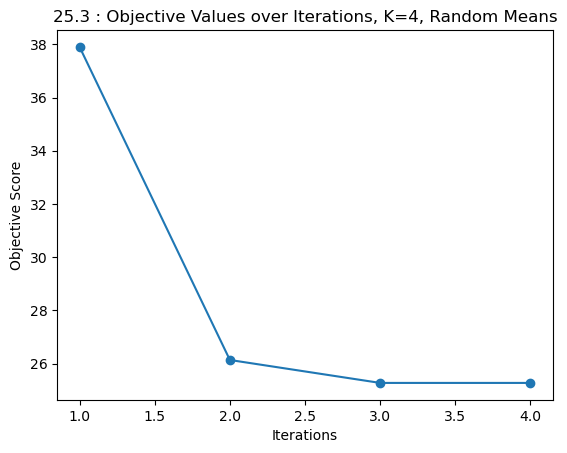

In [385]:
objectives = k_means_results[2]
clusters = k_means_results[0]
create_objectives_plot(objectives, "Objective Values over Iterations, K="+str(k)+", Random Means")

In [386]:
clusters

[2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 1, 3, 0, 0, 2, 1, 1, 2]

In [387]:
countries = covid_norm_df.index.tolist()

In [389]:
mini_idx_df = idx_df[['location_key', 'country_name']]

In [390]:
d = {'location_key': countries, 'clusters': clusters}
clustered_countries_df = pd.DataFrame(d)

In [391]:
clustered_countries_df.head(2)

,location_key,clusters
0,AR,2
1,AU,0


In [392]:
clustered_countries_name_df = (mini_idx_df.merge(clustered_countries_df, on='location_key', how='inner'))
clustered_countries_name_df

,location_key,country_name,clusters
0,AR,Argentina,2
1,AU,Australia,0
2,BE,Belgium,2
3,BR,Brazil,2
4,CH,Switzerland,0
5,CL,Chile,2
6,CZ,Czech Republic,2
7,ES,Spain,2
8,FR,France,0
9,GB,United Kingdom,2


In [393]:
gov_day_agg_mini = gov_day_agg[['stringency_index']]
gov_day_agg_mini

,stringency_index
location_key,
AD,64.81
AE,54.63
AF,19.44
AL,46.30
AO,73.15
...,...
XK,42.59
YE,26.85
ZA,44.44


In [394]:
cluster_stringency_df = clustered_countries_name_df.merge(gov_day_agg_mini, left_on = 'location_key', right_index=True, how='inner')
cluster_stringency_df

,location_key,country_name,clusters,stringency_index
0,AR,Argentina,2,55.560000
1,AU,Australia,0,54.425556
2,BE,Belgium,2,50.000000
3,BR,Brazil,2,32.252222
4,CH,Switzerland,0,52.780000
5,CL,Chile,2,49.540000
6,CZ,Czech Republic,2,47.220000
7,ES,Spain,2,44.910000
8,FR,France,0,72.220000
9,GB,United Kingdom,2,47.500000


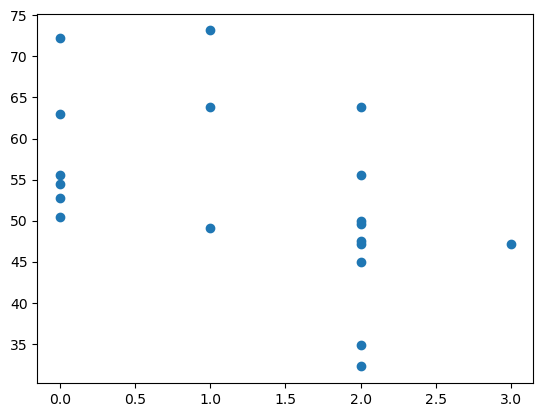

In [395]:
plt.scatter(cluster_stringency_df[['clusters']], cluster_stringency_df[['stringency_index']])

### Below is mostly WHO data

In [64]:
#covid_agg_df = pd.read_csv('../data/aggregated.csv.gz', compression='gzip', header=0, sep=',', quotechar='"')

In [ ]:
print(covid_agg_df.shape)
covid_agg_df.head(3)

In [6]:
covid_global_df = pd.read_csv('../data/WHO-COVID-19-global-data.csv')

In [33]:
vacc_df = pd.read_csv('../data/vaccination-data.csv')

In [34]:
vacc_df.head(5)

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
0,Afghanistan,AFG,EMRO,REPORTING,2023-04-18,16826772.0,14719397,43.225,37.812,14005566,35.978,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2021-02-22,11.0,1072990.0,2.756
1,Albania,ALB,EURO,REPORTING,2023-03-19,3070468.0,1347054,106.700,47.332,1276432,44.851,"AstraZeneca - Vaxzevria,Gamaleya - Gam-Covid-V...",2021-01-13,5.0,395384.0,13.893
2,Algeria,DZA,AFRO,REPORTING,2022-09-04,15267442.0,7840131,34.817,17.879,6481186,14.780,"Beijing CNBG - BBIBP-CorV,Gamaleya - Gam-Covid...",2021-01-30,4.0,575651.0,1.313
3,American Samoa,ASM,WPRO,REPORTING,2023-03-29,114706.0,46206,207.812,83.711,42479,76.959,"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfiz...",2020-12-21,3.0,24160.0,43.770
4,Andorra,AND,EURO,REPORTING,2023-02-26,156957.0,57904,203.100,76.012,53492,70.221,"AstraZeneca - Vaxzevria,Moderna - Spikevax,Pfi...",2021-01-20,3.0,43060.0,56.526


In [43]:
vacc_df.loc[vacc_df['COUNTRY'] == 'United States of America']

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
219,United States of America,USA,AMRO,REPORTING,2023-04-07,666541020.0,267141226,201.37,80.707,227731485,68.801,"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Nova...",2020-12-14,4.0,116145529.0,35.089


In [9]:
covid_global_df.head(3)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0


In [8]:
covid_global_df.tail(3)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
285108,2023-04-17,ZW,Zimbabwe,AFRO,3,264613,0,5684
285109,2023-04-18,ZW,Zimbabwe,AFRO,0,264613,0,5684
285110,2023-04-19,ZW,Zimbabwe,AFRO,0,264613,0,5684


In [42]:
covid_us_df = covid_global_df.loc[covid_global_df['Country'] == 'United States of America']
covid_us_df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
271878,2020-01-03,US,United States of America,AMRO,0,0,0,0
271879,2020-01-04,US,United States of America,AMRO,0,0,0,0
271880,2020-01-05,US,United States of America,AMRO,0,0,0,0
271881,2020-01-06,US,United States of America,AMRO,0,0,0,0
271882,2020-01-07,US,United States of America,AMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
273076,2023-04-15,US,United States of America,AMRO,0,102977396,0,1120529
273077,2023-04-16,US,United States of America,AMRO,0,102977396,0,1120529
273078,2023-04-17,US,United States of America,AMRO,0,102977396,0,1120529
273079,2023-04-18,US,United States of America,AMRO,0,102977396,0,1120529


In [44]:
vacc_df.loc[vacc_df['COUNTRY'] == 'United States of America']

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
219,United States of America,USA,AMRO,REPORTING,2023-04-07,666541020.0,267141226,201.37,80.707,227731485,68.801,"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Nova...",2020-12-14,4.0,116145529.0,35.089


In [20]:
# get most_recent_date
most_recent_date = covid_global_df[['Date_reported']].max().iloc[0]

In [25]:
covid_global_mrd = covid_global_df.loc[covid_global_df['Date_reported'] == most_recent_date]
covid_global_mrd.head(3)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
1202,2023-04-19,AF,Afghanistan,EMRO,0,213191,0,7885
2405,2023-04-19,AL,Albania,EURO,0,333897,0,3604
3608,2023-04-19,DZ,Algeria,AFRO,0,271644,0,6881


In [31]:
np.unique(covid_global_mrd[['WHO_region']])

array(['AFRO', 'AMRO', 'EMRO', 'EURO', 'Other', 'SEARO', 'WPRO'],
      dtype=object)

<AxesSubplot: xlabel='Cumulative_cases', ylabel='Cumulative_deaths'>

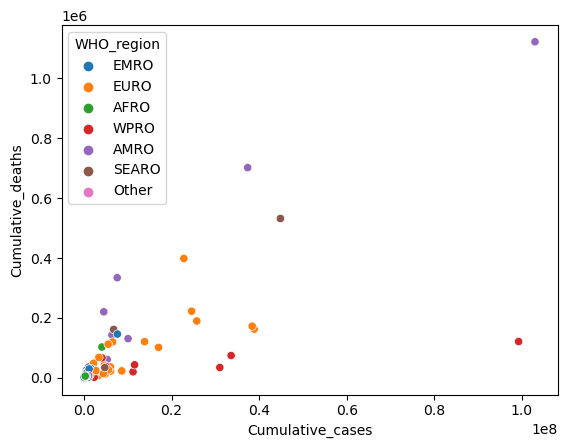

In [32]:
sns.scatterplot(data=covid_global_mrd, x="Cumulative_cases", y="Cumulative_deaths", hue='WHO_region')

In [ ]:
df.loc[df ['col1'] == value]